In [3]:
from pandas import Series, DataFrame
import numpy as np

In [4]:
regioes = ['norte', 'nordeste', 'sudeste', 'sul', 'centro-oeste']
taxa_de_mortalidade_infantil = Series([35.6, 59, 25.2, 22.5, 25.41]) # x
taxa_de_analfabetismo = Series([12.7, 29.4, 8.6, 8.3, 12.4]) # y

mortalidade_analfabetismo = {'regioes':regioes,
                            'taxa_de_mortalidade_infantil': taxa_de_mortalidade_infantil,
                            'taxa_de_analfabetismo': taxa_de_analfabetismo}

mortalidade_analfabetismo_df = DataFrame(mortalidade_analfabetismo)
mortalidade_analfabetismo_df

,regioes,taxa_de_analfabetismo,taxa_de_mortalidade_infantil
0,norte,12.7,35.60
1,nordeste,29.4,59.00
2,sudeste,8.6,25.20
3,sul,8.3,22.50
4,centro-oeste,12.4,25.41


In [5]:
def coeficiente_r(x, y, n):
    xy = x * y
    squared_x = x ** 2
    squared_y = y ** 2
    
    sum_x = x.sum()
    sum_y = y.sum()
    sum_xy = xy.sum()
    sum_squared_x = squared_x.sum()
    sum_squared_y = squared_y.sum()
    
    Sxy = sum_xy - sum_x * sum_y / n
    Sxx = sum_squared_x - sum_x ** 2 / n
    Syy = sum_squared_y - sum_y ** 2 / n 
    
    r = Sxy / np.sqrt(Sxx * Syy)
    return r

In [6]:
coeficiente_r(taxa_de_mortalidade_infantil, taxa_de_analfabetismo, len(taxa_de_analfabetismo))

0.97249677887347097

In [14]:
def regressao_linear(x, y, n):
    xy = x * y
    squared_x = x ** 2
    squared_y = y ** 2

    sum_x = x.sum()
    sum_y = y.sum()
    sum_xy = xy.sum()
    sum_squared_x = squared_x.sum()
    sum_squared_y = squared_y.sum()
    
    a = (n * sum_xy - sum_x * sum_y) / (n * sum_squared_x - sum_x ** 2)
    b = np.mean(y) - a * np.mean(x)
    def find(x):
        return a * x + b
    
    return a, b, find

In [15]:
mortalidade_analfabetismo_df

,regioes,taxa_de_analfabetismo,taxa_de_mortalidade_infantil
0,norte,12.7,35.60
1,nordeste,29.4,59.00
2,sudeste,8.6,25.20
3,sul,8.3,22.50
4,centro-oeste,12.4,25.41


In [16]:
a, b, predict_y_with_linear_regression = regressao_linear(taxa_de_mortalidade_infantil, taxa_de_analfabetismo, len(taxa_de_analfabetismo))
predict_x = 24
predict_y_with_linear_regression(predict_x)

8.92828842994723

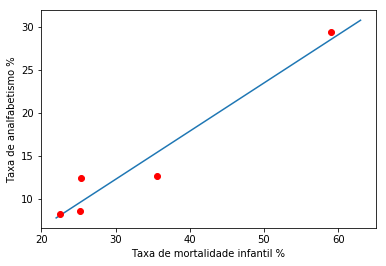

In [39]:
import matplotlib.pyplot as plt

minx = int(taxa_de_mortalidade_infantil.min())
maxx = int(taxa_de_mortalidade_infantil.max())
x = np.array(range(minx, maxx + 5))
formula = "{:f}*x+{:f}".format(a, b)
eq = eval(formula)

plt.plot(x, eq)
plt.plot(taxa_de_mortalidade_infantil, taxa_de_analfabetismo, 'ro')
plt.xlabel('Taxa de mortalidade infantil %')
plt.ylabel('Taxa de analfabetismo %')
plt.show()